In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing

pd.set_option("display.width",70)
data=pd.read_csv("covid19.csv")
data.head

<bound method NDFrame.head of       country iso_code        date  total_vaccinations  \
0     Albania      ALB  2021-01-10                 0.0   
1     Albania      ALB  2021-01-11                 NaN   
2     Albania      ALB  2021-01-12               128.0   
3     Albania      ALB  2021-01-13               188.0   
4     Albania      ALB  2021-01-14               266.0   
...       ...      ...         ...                 ...   
3307    Wales      NaN  2021-02-11            719954.0   
3308    Wales      NaN  2021-02-12            753669.0   
3309    Wales      NaN  2021-02-13            776224.0   
3310    Wales      NaN  2021-02-14            790211.0   
3311    Wales      NaN  2021-02-15            803178.0   

      people_vaccinated  people_fully_vaccinated  \
0                   0.0                      NaN   
1                   NaN                      NaN   
2                 128.0                      NaN   
3                 188.0                      NaN   
4            

In [2]:
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [3]:
data.shape

(3312, 15)

In [4]:
data.isnull().sum()   #Обработка пропусков в данных

country                                   0
iso_code                                260
date                                      0
total_vaccinations                     1167
people_vaccinated                      1538
people_fully_vaccinated                2175
daily_vaccinations_raw                 1528
daily_vaccinations                      126
total_vaccinations_per_hundred         1167
people_vaccinated_per_hundred          1538
people_fully_vaccinated_per_hundred    2175
daily_vaccinations_per_million          126
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

/Users/ding/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


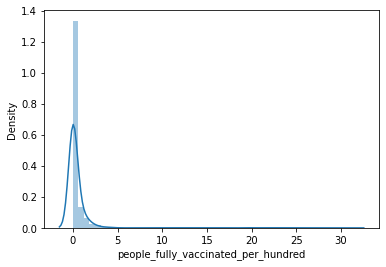

In [21]:
sns.distplot(data['people_fully_vaccinated_per_hundred'].fillna(0));

/Users/ding/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


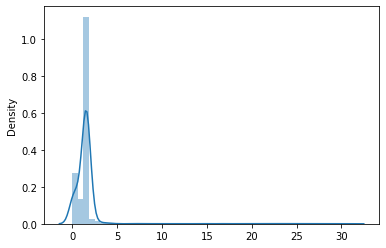

In [22]:
mean_imp = sklearn.impute.SimpleImputer(strategy="mean")
mean_rat = mean_imp.fit_transform(data[["people_fully_vaccinated_per_hundred"]])
sns.distplot(mean_rat);

/Users/ding/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


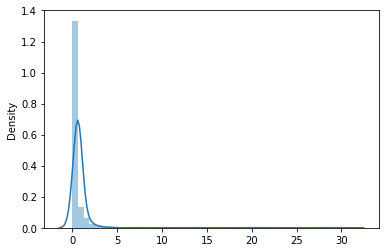

In [23]:
med_imp = sklearn.impute.SimpleImputer(strategy="median")
med_rat = med_imp.fit_transform(data[["people_fully_vaccinated_per_hundred"]])
sns.distplot(med_rat);

/Users/ding/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


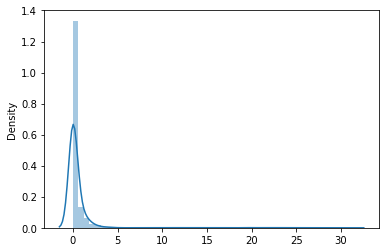

In [24]:
freq_imp = sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rat = freq_imp.fit_transform(data[["people_fully_vaccinated_per_hundred"]])
sns.distplot(freq_rat);

In [25]:
data["people_fully_vaccinated_per_hundred"] = mean_rat

In [20]:
vaccines1 = data["vaccines"].dropna().astype(str)  #Кодирование категориальных признаков
vaccines1.value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          970
Pfizer/BioNTech                                                                       771
Oxford/AstraZeneca, Pfizer/BioNTech                                                   521
Moderna, Pfizer/BioNTech                                                              327
Sputnik V                                                                             127
Oxford/AstraZeneca                                                                     99
Sinovac                                                                                71
Pfizer/BioNTech, Sinovac                                                               64
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac                                            57
Pfizer/BioNTech, Sinopharm/Beijing                                                     56
Oxford/AstraZeneca, Sinopharm/Beijing                                                  56
Oxford/Ast

In [28]:
 le = sklearn.preprocessing.LabelEncoder()
vaccines1_le = le.fit_transform(vaccines1)
print(np.unique(vaccines1_le))
le.inverse_transform(np.unique(vaccines1_le))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


array(['Covaxin, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Pfizer/BioNTech', 'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Oxford/AstraZeneca, Sputnik V',
       'Pfizer/BioNTech', 'Pfizer/BioNTech, Sinopharm/Beijing',
       'Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech, Sinovac', 'Sinopharm/Beijing',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac', 'Sinovac',
       'Sputnik V'], dtype=object)

In [29]:
vaccines_oh = pd.get_dummies(vaccines1)
vaccines_oh.head()

,"Covaxin, Oxford/AstraZeneca","Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","Moderna, Pfizer/BioNTech",Oxford/AstraZeneca,"Oxford/AstraZeneca, Pfizer/BioNTech","Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V","Oxford/AstraZeneca, Sinopharm/Beijing","Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V","Oxford/AstraZeneca, Sinovac","Oxford/AstraZeneca, Sputnik V",Pfizer/BioNTech,"Pfizer/BioNTech, Sinopharm/Beijing","Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V","Pfizer/BioNTech, Sinovac",Sinopharm/Beijing,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",Sinovac,Sputnik V
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
vaccines_oh[vaccines_oh["Sputnik V"] == 1].head()

,"Covaxin, Oxford/AstraZeneca","Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","Moderna, Pfizer/BioNTech",Oxford/AstraZeneca,"Oxford/AstraZeneca, Pfizer/BioNTech","Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V","Oxford/AstraZeneca, Sinopharm/Beijing","Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V","Oxford/AstraZeneca, Sinovac","Oxford/AstraZeneca, Sputnik V",Pfizer/BioNTech,"Pfizer/BioNTech, Sinopharm/Beijing","Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V","Pfizer/BioNTech, Sinovac",Sinopharm/Beijing,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",Sinovac,Sputnik V
31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


/Users/ding/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


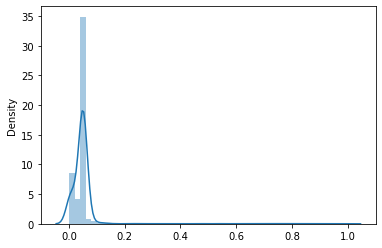

In [37]:
mm = sklearn.preprocessing.MinMaxScaler()    # Масштабирование данных
sns.distplot(mm.fit_transform(data[["people_fully_vaccinated_per_hundred"]]));

/Users/ding/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


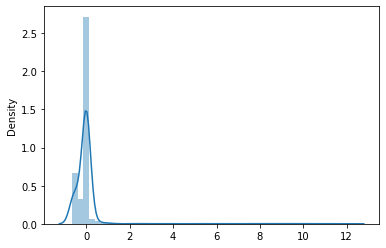

In [38]:
ss = sklearn.preprocessing.StandardScaler()
sns.distplot(ss.fit_transform(data[["people_fully_vaccinated_per_hundred"]]));